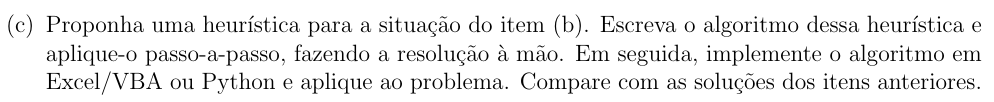

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='images/1c.png')

In [1]:
# Bibliotecas
import xlwings as xw
import pandas as pd

In [2]:
# Dados
wb = xw.Book('dados_1.xlsx')
sheet = wb.sheets['Plan1']

# Conjuntos
Clientes = sheet.range("C2:G2").value
n = len(Clientes)  # Número de clientes (5)

Veiculos = sheet.range("A12:A14").value

Nos = [i for i in range(n + 2)]

# Parâmetros
custo_transporte = sheet.range("A2:H9").options(pd.DataFrame).value
custo_transporte = custo_transporte.stack().to_dict()

demanda = sheet.range("D12:E18").options(dict).value

capacidade = sheet.range("A12:B14").options(dict).value

tempo_viagem = custo_transporte.copy()

tempo_servico = sheet.range("G21:H27").options(dict).value

horario_inicial = sheet.range("A21:B27").options(dict).value

horario_final = sheet.range("D21:E27").options(dict).value

In [3]:
def proximo_no(nos, tempo, t_viagem, h_fechamento, rota):
    """
    nos: lista de nós a serem visitados;
    tempo: variável que acumula o tempo viajado;
    t_viagem: tempo de viagem entre os pontos i e j;
    h_fechamento: horario limite de chegada no nó;
    rota: rota percorrida.
    Retorna o ponto j, mais próximo de i que não foi visitado
    e ainda é possível chegar antes do fechamento
    """
    
    c = 1000
    i = rota[-1]
    j = nos[-1]
    
    if i == 0:
        for n in nos:
            # Nó não foi visitado e não é o último
            if n not in rota and n != nos[-1]:
                # A chegada ao nó ocorre dentro do tempo de funcionamento
                if (tempo + t_viagem[i, n] <= h_fechamento[n]):
                    # Encontra o j mais próximo de i
                    if t_viagem[i, n] < c:
                        c = t_viagem[i, n]
                        j = n
    
    elif i == nos[-1]:
        j = 0
    
    else:
        for n in nos:
            # Se nó não foi visitado ou é o nó da fábrica
            if n not in rota or n == nos[-1]:
                 # A chegada ao nó ocorre dentro do tempo de funcionamento
                if (tempo + t_viagem[i, n] <= h_fechamento[n]):
                    # Encontra o j mais próximo de i
                    if t_viagem[i, n] < c:
                        c = t_viagem[i, n]
                        j = n

    return j

In [4]:
# 1. Rota inicia em 0
rota = [0]

In [5]:
# 2. Tempo inicia em 420 minutos (7h da manhã)
tempo_inicial = 420 
tempo = tempo_inicial
# Custo inicial
custo = 0

In [6]:
# 7. Loop para o preenchimento da rota
for n in Nos:
    while n not in rota:
        # 3. i recebe o último nó da rota
        i = rota[-1]
        # 4. Escolhe j como nó mais próximo de i que não foi visitado e a chegcada ocorre antes do fechamento
        j = proximo_no(Nos, tempo, tempo_viagem, horario_final, rota)
        # 5. Adiciona j ao final da rota
        rota.append(j)
        # 6. Atualiza o tempo de viagem e custo
          # Tempo
        if rota[-2] == Nos[-1]:  # Caso um novo caminhão realize a viagem
            tempo = tempo_inicial  # Reinicia a contagem do tempo
        else:
            tempo = max(tempo + tempo_viagem[i, j] + tempo_servico[j], horario_inicial[j] + tempo_servico[j])
          # Custo
        custo += custo_transporte[i, j]

In [7]:
# 8. Adiciona o nó final ao final da rota
rota.append(Nos[-1])

In [8]:
# 9. Custo final
custo += custo_transporte[rota[-2], rota[-1]]

In [9]:
rota

[0, 2, 6, 0, 5, 6, 0, 1, 6, 0, 4, 6, 0, 3, 6]

In [10]:
custo

121.0